# Testo Esercizio

Si inizia con lo Jupyter Notebook clustering-copy_for_students_aa_20_21.ipynb:
- si eseguano gli algoritmi di clustering: K-means e DBSCAN sui tre datasets 
- quali valori dell'iper-parametro k usereste nei tre diversi datasets? Esiste un valore ottimale?
- quail misura di valutazione potreste calcolare sui clusters di K-means?
- quale soluzione vi sembra migliore?
- per DBSCAN: 
- si esegua DBSCAN su uno degli ultimi due datasets a vostra scelta
- si plotti la reachability distance ordinata (distanza del k-esimo vicino) per i punti in uno degli ultimi due datasets (CURE-dataset o DBSCAN-dataset) 
- come conseguenza del grafico, trovare i valori degli iper-parametri eps e minPts 
- eseguite DBSCAN con questa coppia di valori degli iper-parametri. Funziona bene?

# Load Data Function
### Function used to open the .csv datasets

In [1]:
import csv
from os.path import join
import numpy as np


def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
       n_features = int(temp1[1])
       temp2 = next(data_file)
       
       feature_names = np.array(temp2[:n_features])
       data_list = [iter for iter in data_file]
       data = np.asarray(data_list, dtype=np.float64)                  
       

   return(data,feature_names,n_samples,n_features)


## Load all the datasets

In [2]:
#file_path="content/"
file_path="../sample_data/"

# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"
file_name2="dataset-DBSCAN.csv"     
file_name3="CURE-complete.csv"    

data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)

print("Dataset:", file_name1)
print("Number of samples:", n_samples1)
print("Number of features", n_features1)
print()

print("Dataset:", file_name2)
print("Number of samples:", n_samples2)
print("Number of features", n_features2)
print()

print("Dataset:", file_name3)
print("Number of samples:", n_samples3)
print("Number of features", n_features3)

Dataset: 3-clusters.csv
Number of samples: 150
Number of features 2

Dataset: dataset-DBSCAN.csv
Number of samples: 6118
Number of features 2

Dataset: CURE-complete.csv
Number of samples: 86558
Number of features 2


# Plot all datasets

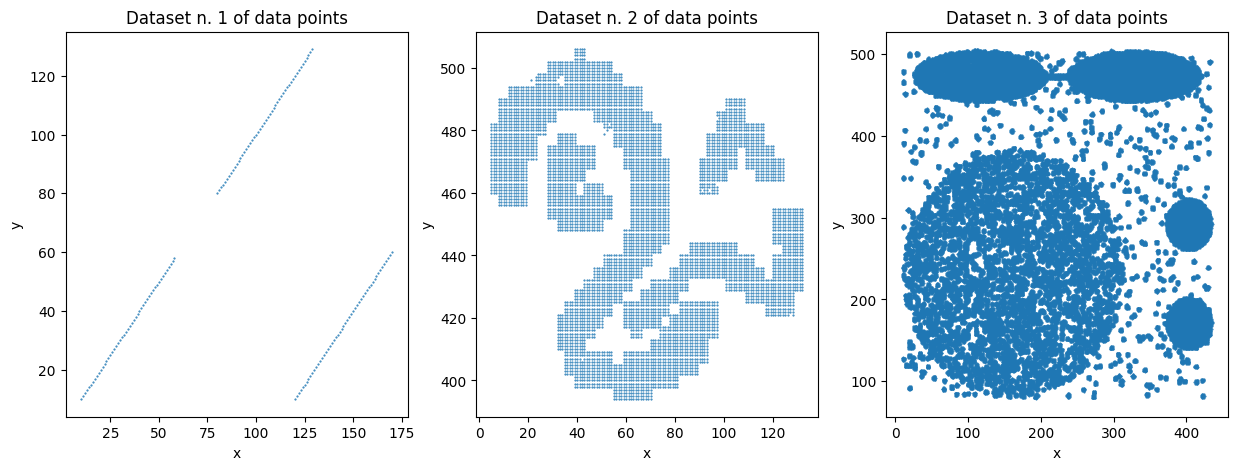

In [6]:
import matplotlib.pyplot as plt


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
plt.subplots_adjust(hspace=2)

ax1.set_title('Dataset n. 1 of data points')
ax1.set_xlabel(feature_names1[0])
ax1.set_ylabel(feature_names1[1])
ax1.plot(data1[:,0], data1[:,1], '.',markersize=1)

ax2.set_title('Dataset n. 2 of data points')
ax2.set_xlabel(feature_names2[0])
ax2.set_ylabel(feature_names2[1])
ax2.plot(data2[:,0], data2[:,1], '.',markersize=1)

ax3.set_title('Dataset n. 3 of data points')
ax3.set_xlabel(feature_names3[0])
ax3.set_ylabel(feature_names3[1])
ax3.plot(data3[:,0], data3[:,1], '.',markersize=1)

plt.show()


## Utilities function

In [91]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN


def cluster_kmeans(number_cluster:int, dataset:list):
    """A simple clustering function using the kmeans algorithm"""
    
    seed = np.random.seed(5)
    model = KMeans(n_clusters=number_cluster, n_init='auto', random_state=seed).fit(dataset)
    return model


def train_DBSCAN(data: list, eps: float, min_pts:int):
    """Train a DBSCAN model"""
    
    model = DBSCAN(eps=eps, min_samples=min_pts).fit(data)
    return model



def plot_kmeans_data(number_cluster, model, dataset, n_samples, sizeX, sizeY):
    """Simple function used to plot the cluster"""

    fig = plt.figure(figsize=(sizeX,sizeY))

    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=1)
    ax.set_title('Clustered points in dataset n. 1')

    ax.set_xlabel('x')
    ax.set_ylabel('y')

    # set the list of colors to be selected when plotting the different clusters
    color=['b','g','r','c','m','y','k','brown']
        
    #plot the dataset
    for cluster in range(number_cluster):
        # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
        data_list_x = [dataset[i,0] for i in range(n_samples) if model.labels_[i] == cluster]
        data_list_y = [dataset[i,1] for i in range(n_samples) if model.labels_[i] == cluster]
        plt.scatter(data_list_x, data_list_y, s=8, label="Cluster " + str(cluster), edgecolors='none', c = color[cluster], alpha=0.5)

    plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
    plt.legend()
    plt.show()



def plot_best_k_clusters(data: list, min_range: int, max_range: int):

    best_score = 0
    best_cluster = min_range
    model = None
    best_model = None
    scores = np.zeros(max_range + 1, dtype=float) # for storing silhouette score
    
    
    for cluster in range (min_range, max_range + 1):
        model = cluster_kmeans(cluster, data)
        silhouette = silhouette_score(data, model.labels_)
        scores[cluster] = silhouette
        print("k = ", cluster, "scores: ", silhouette)
        
        
        if(silhouette > best_score):
            best_score = silhouette
            best_cluster = cluster
            best_model = model

    print("\nBest value for k: ", best_cluster)
    print("best silhouette score: ", best_score)

    plt.xticks(np.arange(min_range, max_range + 1, 1))
    plt.yticks(np.arange(0.0,1.0,0.01))
    plt.plot(np.arange(min_range, max_range + 1), scores[min_range:])
    plt.axhline(y=best_score, linewidth=1, linestyle='dashed', color='k')
    plt.axvline(x=best_cluster, linewidth=1, linestyle='dashed', color='k')
    
    plt.xlabel('number of clusters')
    plt.ylabel('Silhouette score')
    plt.show()

    return best_cluster, best_model



def plot_silhouette_curve(data: list, number_cluster: int):
    
    seed = np.random.seed(5)
    model = SilhouetteVisualizer(KMeans(n_clusters=number_cluster, n_init='auto', random_state=seed), colors=['b','g','r','c','m','y','k','brown'])
    model.fit(data)
    model.show()



def plot_DBSCAN_cluster(data:list,cluster_and_noise_labels:list, sizeX:int, sizeY:int):
    """A simple function for plotting the DBSCAN result"""


    clusters = set(filter(lambda  l: l!=-1, cluster_and_noise_labels))
    noise_point = len(list(filter(lambda  l: l==-1, cluster_and_noise_labels)))
    data_points = data
    colors =['b','g','r','c','m','y','k','brown']
    
    # Plot the original data points
    x=list(map(lambda p: p[0],data_points))
    y=list(map(lambda p: p[1],data_points))
        
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(sizeX, sizeY))
    plt.subplots_adjust(hspace=2)
    
    fig.suptitle('DBSCAN plot')
    ax1.set_title("Original points")
    ax1.plot(x,y, '.', markersize=3)
    
    
    #Plot the clusters and outliers
    ax2.set_title("Clusters")
    tuples_of_data_points_class_labels=list(zip(x,y,cluster_and_noise_labels))
    unique_labels = set(cluster_and_noise_labels)
    
    for label in unique_labels:
        noisy_points=list(filter(lambda t: t[2] == label, tuples_of_data_points_class_labels))
        point_x = list(map(lambda  p:p[0],noisy_points))
        point_y = list(map(lambda  p:p[1],noisy_points))
        
        if (label == -1):
            ax2.scatter(point_x, point_y, marker='x', s=6, label="Outlier", c="black")
        else:
            legend_label="Cluster %d" % (label)
            ax2.scatter(point_x, point_y, marker='.', s=4, label=legend_label, c=colors[label])
    
    
    ax2.legend(loc="best" )
    plt.show()

    return clusters, noise_point

# K-means
- addestrare il modello K-means sui 3 datasets
- quali valori dell'iper-parametro k usereste nei tre diversi datasets? Esiste un valore ottimale?
- quail misura di valutazione potreste calcolare sui clusters di K-means?
- quale soluzione vi sembra migliore?

### Esecuzione dell'algoritmo K-Means su dataset1 con k = 3 scelto da una prima osservazione 

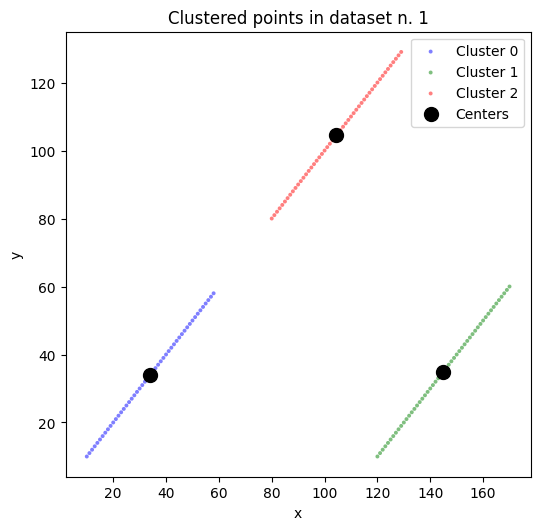

In [12]:
number_cluster = 3
kmeans1 = cluster_kmeans(number_cluster, data1)
plot_kmeans_data(number_cluster, kmeans1, data1, n_samples1, 6,5)

## Spiegazione dei risultati

Osservando la disposizione dei datapoints del dataset 1, si nota immediatamente come siano presenti 3 cluster ben separati. La scelta sul valore del parametro K = 3, a priori, senza alcuna valutazione più profonda viene suggerita proprio da questa prima osservazione

## Esecuzione dell'algoritmo K-Means su dataset2 con k = 3 scelto da una prima osservazione 

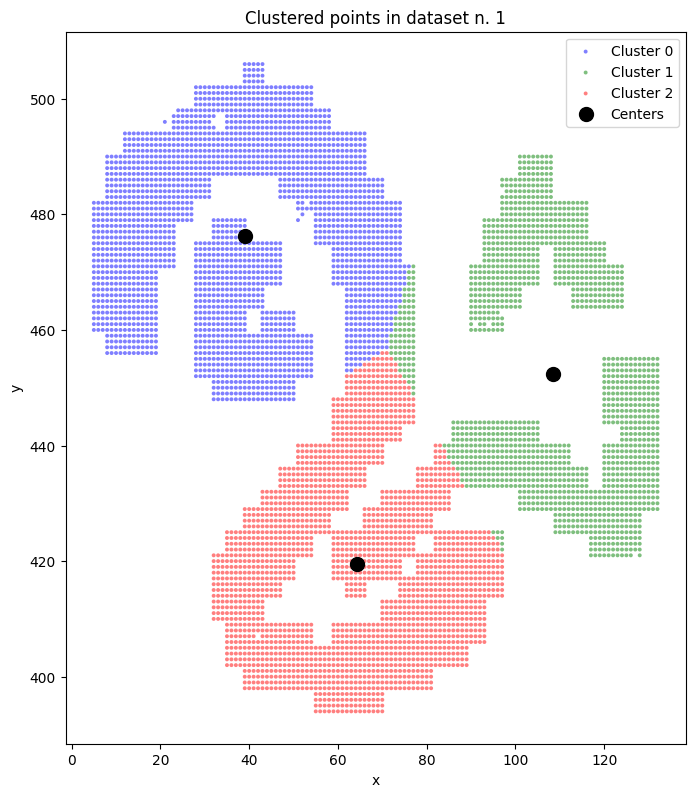

In [13]:
number_cluster = 3
kmeans2 = cluster_kmeans(number_cluster, data2)
plot_kmeans_data(number_cluster, kmeans2, data2, n_samples2, 8,8)

## Spiegazione dei risultati

Da una prima osservazione del dataset 2, è stato scelto, come numero di cluster, un valore di k=3. La scelta a priori è stata presa considerando la forma che i datapoint assumono nel dataset2. In particolare si nota la presenza di 3 macro aree in cui si concentrano la maggior parte dei datapoint, riconoscendovi complessivamente nel dataset, pochi elementi outlier. 
Le 3 zone sono:
- in alto a sinistra
- in basso
- in alto a destra 

### Esecuzione dell'algoritmo K-Means su dataset3 con k = 5 scelto da una prima osservazione 

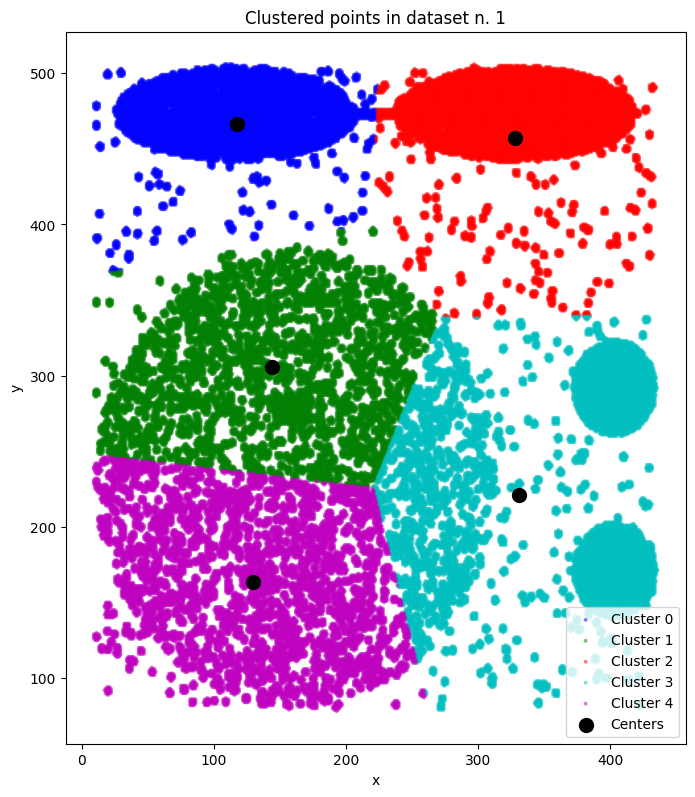

In [16]:
number_cluster = 5
kmeans3 = cluster_kmeans(number_cluster, data3)
plot_kmeans_data(number_cluster, kmeans3, data3, n_samples3, 8,8)

## Spiegazione dei risultati

Guardando la composizione dei datapoint, il dataset3 presenta diverse zone dove si addensano la maggior parte dei dati. Da una prima osservazione, il numero k = 5 sembrerebbe una buona base di partenza per l'esecuzione dell'algoritmo K-means. Infatti osservando la disposizione dei datapoints nel dataset, sono presenti 5 zone principali:

- in alto a sinistra
- in alto a destra
- nel centro a destra
- in basso a destra
- in basso a sinistra

In particolare l'algoritmo non tiene conto dell'insieme di dati relativo all'ultimo gruppo, di fatti partizionando quei punti in 3 raggruppamenti diversi.
Il comportamento dell'algoritmo si può spiegare solo considerando il suo funzionamento. In questo caso, il dataset presenta molti elementi outlier che spingono kmeans a costruire cluster diversi rispetto a quello che si penserebbe, dando uno sguardo alla composizione dei dati. 

## Tuning dell'algoritmo K-means sulla scelta del miglior valore per il parametro k

- quali valori dell'iper-parametro k usereste nei tre diversi datasets? Esiste un valore ottimale?
- quail misura di valutazione potreste calcolare sui clusters di K-means?
- quale soluzione vi sembra migliore?


(In the following cells I propose you to write a program that computes with a statistical measure of your choice a quantitative evaluation of clusters in the three datasets.
**Note:**
It is advisable to execute K-means a certain number of times (let us try 10 times) and then select the clustering solution that gives the best value of the evaluation measure.)

### Tuning K-means sul dataset 1

k =  2 scores:  0.5651096232579514
k =  3 scores:  0.7229402453727759
k =  4 scores:  0.6824925173029859
k =  5 scores:  0.6267921249457009
k =  6 scores:  0.6109711037749568
k =  7 scores:  0.5952458792940403
k =  8 scores:  0.5787057777033952
k =  9 scores:  0.5650110739021121
k =  10 scores:  0.5556458336608592

Best value for k:  3
best silhouette score:  0.7229402453727759


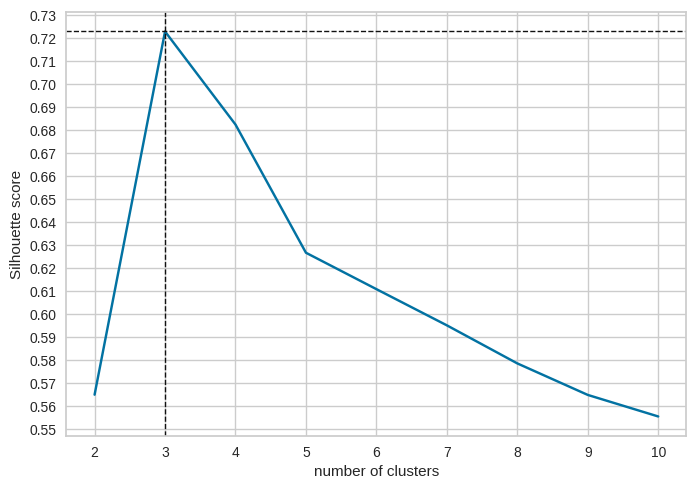

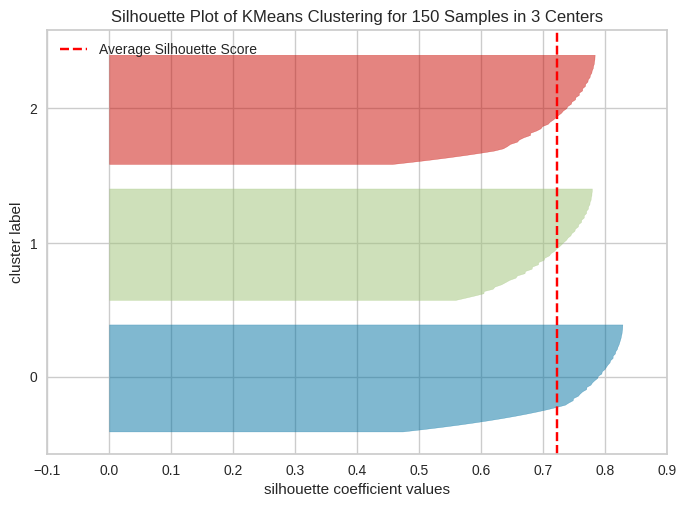

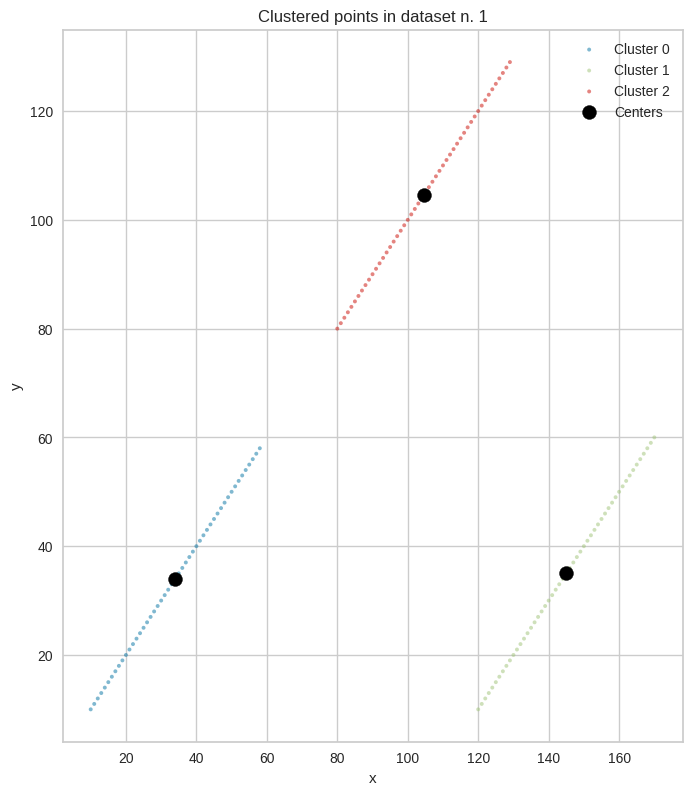

In [58]:
min_cluster = 2
max_cluster = 10
best_k, best_model1 = plot_best_k_clusters(data1, min_cluster, max_cluster)
plot_silhouette_curve(data1, best_k)
plot_kmeans_data(best_k, best_model1, data1, n_samples1, 8,8)

### Tuning K-means sul dataset 2

k =  2 scores:  0.43322366812579544
k =  3 scores:  0.48003124314329937
k =  4 scores:  0.4163374829558082
k =  5 scores:  0.42552959446012445
k =  6 scores:  0.414694859442803
k =  7 scores:  0.4342424911932656
k =  8 scores:  0.4177486950577413
k =  9 scores:  0.44810583394778997
k =  10 scores:  0.43780367963060296

Best value for k:  3
best silhouette score:  0.48003124314329937


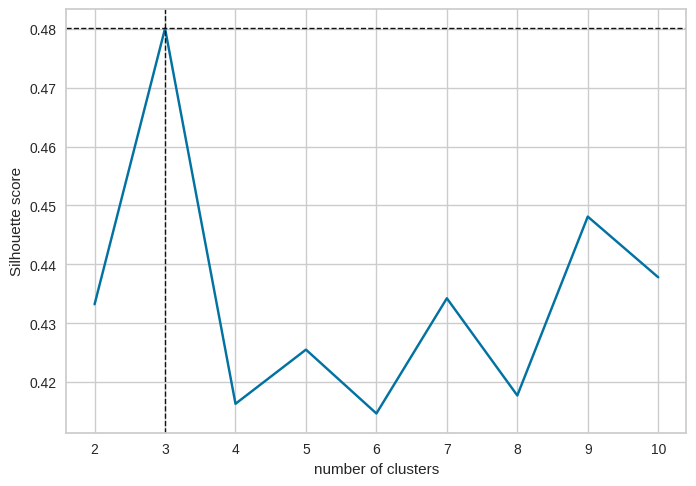

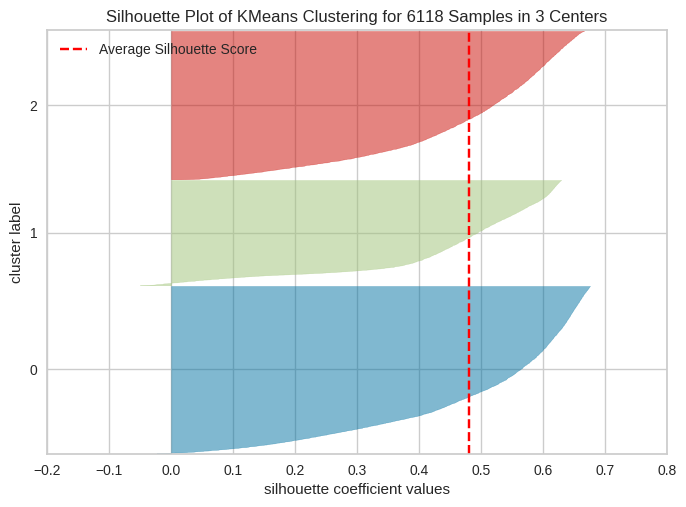

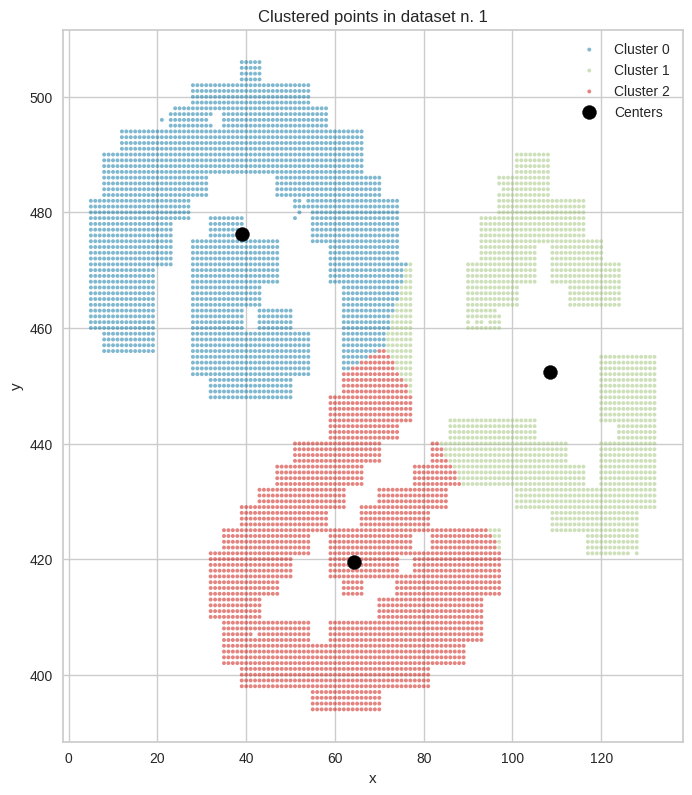

In [57]:
min_cluster = 2
max_cluster = 10
best_k, best_model2 = plot_best_k_clusters(data2, min_cluster, max_cluster)
plot_silhouette_curve(data2, best_k)
plot_kmeans_data(best_k, best_model2, data2, n_samples2, 8,8)

### Tuning K-means sul dataset 3

k =  2 scores:  0.3828131004075043
k =  3 scores:  0.37212906921991984
k =  4 scores:  0.40876053857477834
k =  5 scores:  0.41390506755296275
k =  6 scores:  0.4271848729857694
k =  7 scores:  0.42595515805857664
k =  8 scores:  0.4212954376802769
k =  9 scores:  0.4012187606644429
k =  10 scores:  0.39839805334241984

Best value for k:  6
best silhouette score:  0.4271848729857694


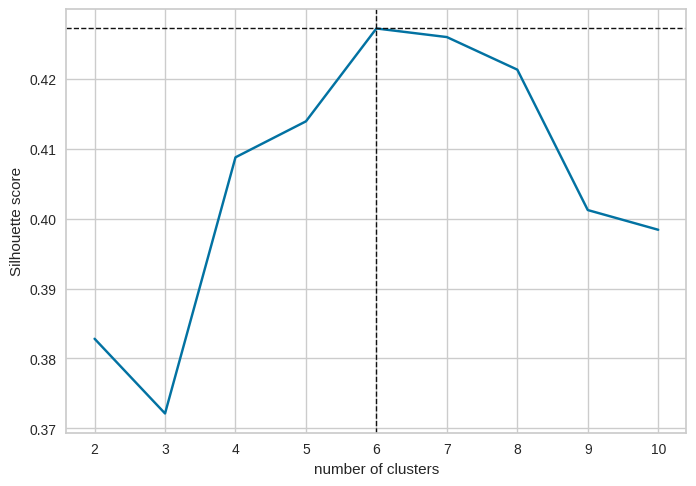

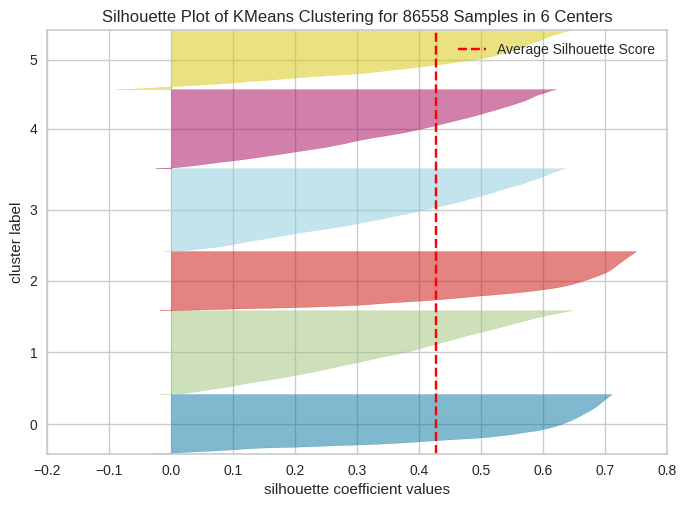

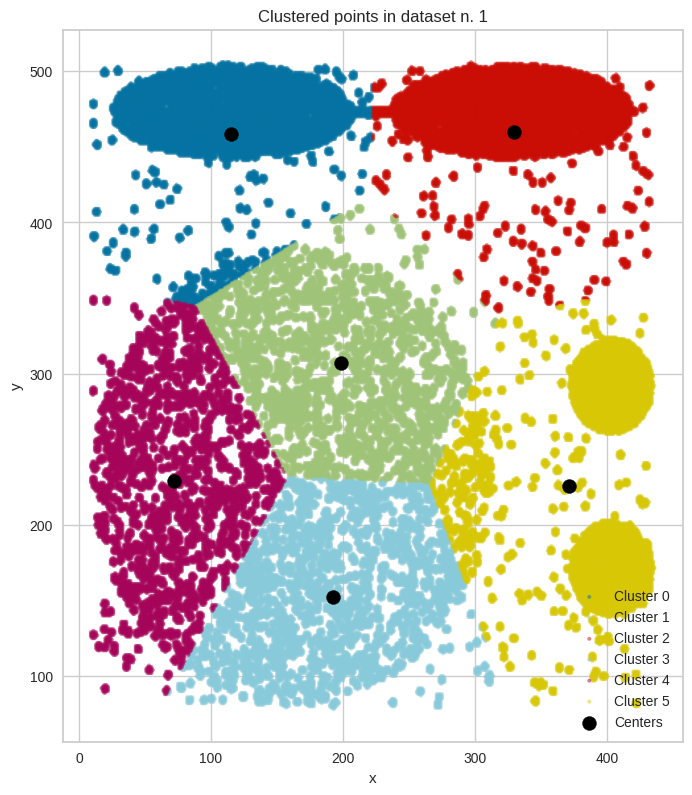

In [59]:
min_cluster = 2
max_cluster = 10
best_k, best_model3 = plot_best_k_clusters(data3, min_cluster, max_cluster)
plot_silhouette_curve(data3, best_k)
plot_kmeans_data(best_k, best_model3, data3, n_samples3, 8,8)

# Risultati
- Sul dataset 1 la scelta migliore per il parametro k è 3
- Sul dataset 2 la scelta migliore per il parametro k è 3
- Sul dataset 3 la scelta migliore per il parametro k è 5

# DBSCAN
- si esegua DBSCAN su uno degli ultimi due datasets a vostra scelta
- si plotti la reachability distance ordinata (distanza del k-esimo vicino)
- come conseguenza del grafico, trovare i valori degli iper-parametri eps e minPts
- eseguite DBSCAN con questa coppia di valori degli iper-parametri. Funziona bene?


## Esecuzione dell'algoritmo DBSCAN sul dataset 2
Per questo secondo modello, la scelta a priori sui valori degli iperparametri Mipts e Epsilon è stata presa osservando la dispersione dei datapoints lungo le coordinate x e y del dataset2. 

- La scelta su Epsilon influenza quella di Minpts, e viceversa
- In particolare, il valore di Minpts è stato scelto seguendo le linee guida generali (Sander et al. 1998) per un valore pari a "due volte il numero delle features", quindi Minpts = 4
- Epsilon controlla la dimensione del cluster. Dato che i punti del dataset sono molto vicini è stato scelto un valore eps basso pari a 1. Quindi Epsilon = 1


Train DBSCAN with MinPts: 4 and Eps: 1


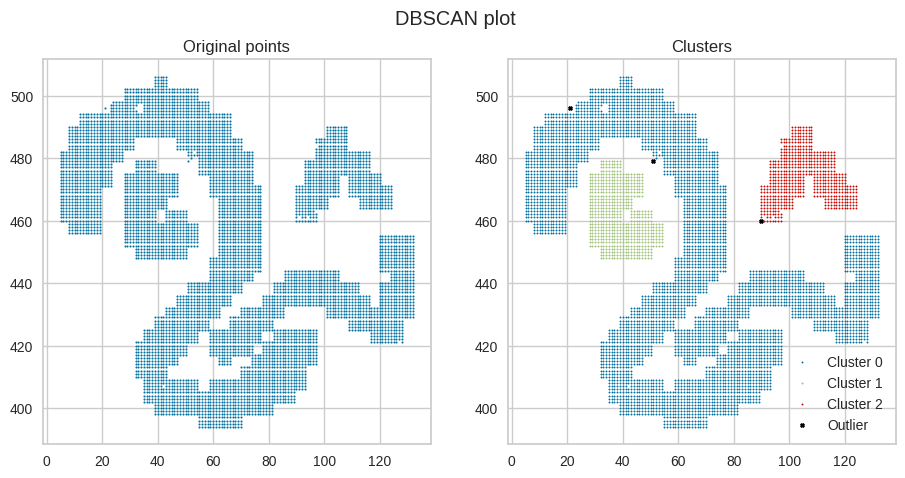


Number of datapoints:  6118
Number of cluster built:  3
Number of noise point found:  3


In [90]:
min_pts = 4
eps = 1
print("Train DBSCAN with MinPts:", min_pts, "and Eps:", eps)

dbscan1 = train_DBSCAN(data2, eps, min_pts)
labels = dbscan1.labels_
clusters, noise_point = plot_DBSCAN_cluster(data2, labels, 11, 5)

print("\nNumber of datapoints: ", len(labels))
print("Number of cluster built: ", len(clusters))
print("Number of noise point found: ", noise_point)

## Scegliere il miglior valore per Epsilon

- Per determinare il miglior valore di Epsilon si utilizza l'approccio K-Nearest Neighbours come spiegato negli articoli: Sander et al. 1998 e Schubert et al. 2017

- Secondo gli autori, preso un Dataset N-dimensionale si sceglie "n_neighbors" in sklearn.neighbors.NearestNeighbors pari a 2xN - 1 e si calcolano le distanze dei K-vicini più vicini (K è 2xN - 1) per ogni punto nel dataset. Si Ordinano le distanze per ordine crescente e si riporta il grafico risultante. 

- Il "gomito" del grafico che separa i punti rumorosi (con un'elevata distanza K-vicino più vicino) dai punti che molto probabilmente cadranno in un cluster (con una distanza K-vicino più vicino relativamente bassa). 

- La distanza alla quale si verifica questo "gomito" è il punto di eps ottimale.

In [115]:
from sklearn.neighbors import NearestNeighbors


def plot_elbow_curve(data:list, minPTS:int, sizeX, sizeY):
    """Plot the Elbow curve of the k-nearest distances of each datapoints"""
    
    nbrs = NearestNeighbors(n_neighbors=minPTS).fit(data)

    # For each point, compute distances to its k-nearest neighbors
    distances, indices = nbrs.kneighbors(data) 
    distances = np.sort(distances, axis=0)
    distances = distances[:, minPTS-1]

    # Plot the sorted K-nearest neighbor distance for each point in the dataset
    plt.figure(figsize=(sizeX,sizeY))
    plt.plot(distances)
    plt.xlabel('Datapoints', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(minPTS), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.3)
    plt.show()
    plt.close()

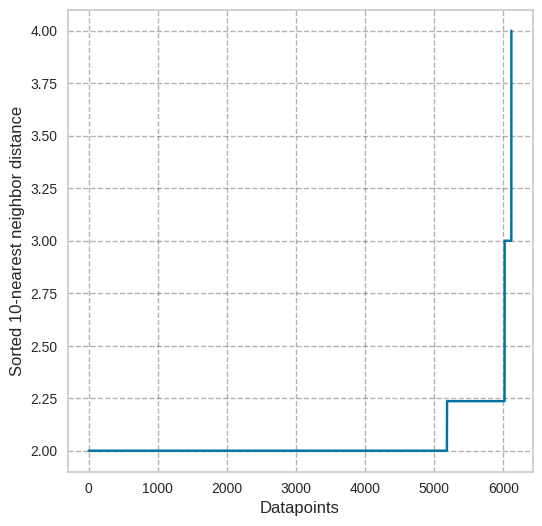

In [125]:
minPTS = 10
plot_elbow_curve(data2, minPTS, 6,6)

Train DBSCAN with MinPts: 10 and Eps: 2.25


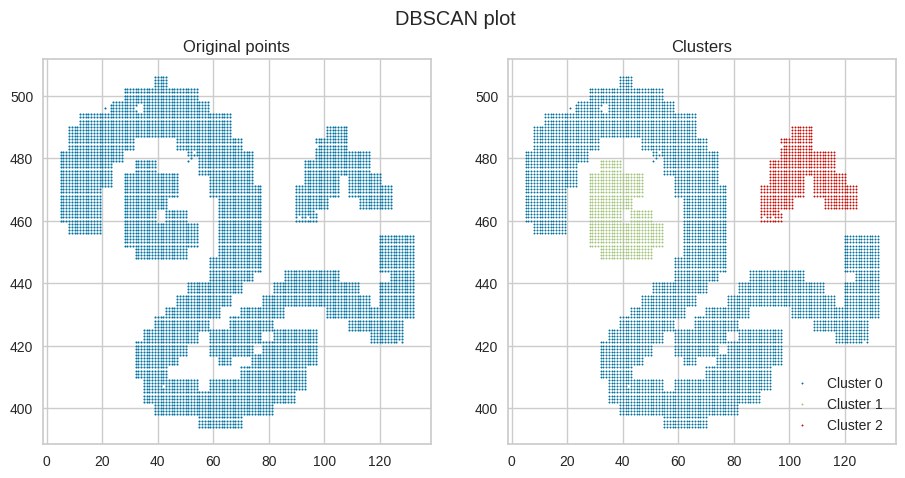


Number of datapoints:  6118
Number of cluster built:  3
Number of noise point found:  0


In [124]:
min_pts = 10
eps = 2.25
print("Train DBSCAN with MinPts:", min_pts, "and Eps:", eps)

dbscan1 = train_DBSCAN(data2, eps, min_pts)
labels = dbscan1.labels_
clusters, noise_point = plot_DBSCAN_cluster(data2, labels, 11, 5)

print("\nNumber of datapoints: ", len(labels))
print("Number of cluster built: ", len(clusters))
print("Number of noise point found: ", noise_point)